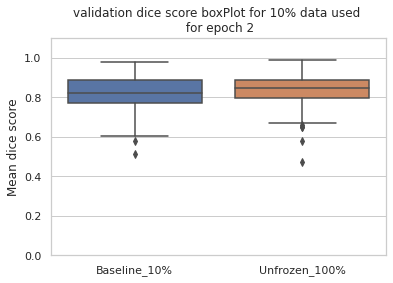

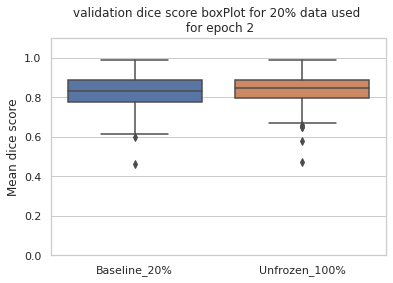

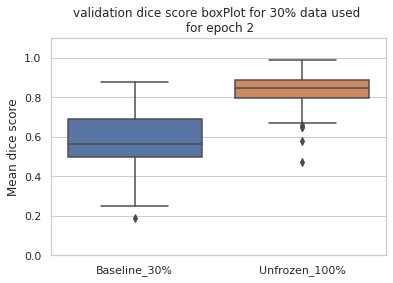

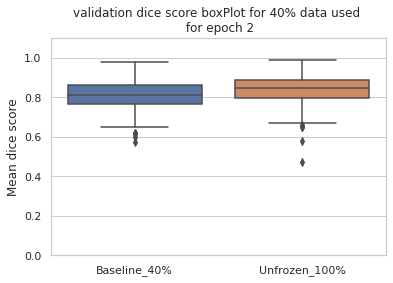

In [11]:
import seaborn as sns
import numpy as np
import pandas as pd
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

input_1 = "/Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main_10_percent"
input_2 = "/Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main_20_percent"
input_3 = "/Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main_30_percent"
input_4 = "/Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main_40_percent"

display_epoch = 2
data_amount = [10,20,30,40]
inputs = [input_1,input_2,input_3,input_4]
# inputs2 = [input_11,input_12,input_13,input_14,input_15]
x_array = np.array([])
y_array = np.array([])
a_array = np.array([])

#for j in range(6):
a = np.genfromtxt("Checkpoints/split_data_experiments/1_Full_model_MK6_H16_PFE_CO100_R3_lr_0003_dice_main/epoch_"+str(display_epoch)+"validation_dice.csv", delimiter=',')
a_array = np.append(a_array, a)
data_a = pd.DataFrame(data=a_array,columns=range(1)).assign(Data="Unfrozen_100%")

for i in range(len(inputs)):
    #for j in range(6):
    x = np.genfromtxt("Checkpoints/split_data_experiments/"+inputs[i]+"/epoch_"+str(display_epoch)+"validation_dice.csv", delimiter=',')
    x_array = np.append(x_array, x)
#     y = np.genfromtxt("Checkpoints/split_data_experiments/"+inputs2[i]+"/epoch_"+str(display_epoch)+"validation_dice.csv", delimiter=',')
#     y_array = np.append(y_array, y)

    data_x = pd.DataFrame(data=x_array,columns=range(1)).assign(Data="Baseline_"+str(data_amount[i])+"%")
    data_y = pd.DataFrame(data=y_array,columns=range(1)).assign(Data="Unfrozen_"+str(data_amount[i])+"%")
    train_data = pd.concat([data_x,data_y,data_a])
    train_data_2 = pd.melt(train_data, id_vars=['Data'])

    ax = sns.boxplot(x="Data", y="value", data=train_data_2)
    plt.title("validation dice score boxPlot for " +str(data_amount[i])+"% data used \n for epoch " + str(display_epoch))
    plt.ylabel("Mean dice score")
    plt.xlabel("")
    plt.ylim(0,1.1)
    plt.show()
    x_array = np.array([])
    y_array = np.array([])

# for i in range(len(inputs)):
#     #for j in range(6):
#     x = np.genfromtxt("Checkpoints/split_data_experiments/"+inputs[i]+"/epoch_"+str(display_epoch)+"validation_dice.csv", delimiter=',')
#     x_array = np.append(x_array, x)
#     y = np.genfromtxt("Checkpoints/split_data_experiments/"+inputs2[i]+"/epoch_"+str(display_epoch)+"validation_dice.csv", delimiter=',')
#     y_array = np.append(y_array, y)

#     data_x = pd.DataFrame(data=x_array,columns=range(1)).assign(Data="Baseline_"+str(data_amount[i])+"%")
#     data_y = pd.DataFrame(data=y_array,columns=range(1)).assign(Data="Unfrozen_"+str(data_amount[i])+"%")
#     train_data = pd.concat([data_x,data_y,data_a])
#     train_data_2 = pd.melt(train_data, id_vars=['Data'])

#     ax = sns.violinplot(x="Data", y="value", data=train_data_2)
#     plt.title("validation dice score violinPlot for " +str(data_amount[i])+"% data used \n for epoch " + str(display_epoch))
#     plt.ylabel("Mean dice score")
#     plt.xlabel("")
#     plt.show()
#     x_array = np.array([])
#     y_array = np.array([])